In [69]:
import numpy as np
import scipy as sp
from src import py_msent
import matplotlib.pyplot as plt
import fathon
from fathon import fathonUtils as fu
from scipy.integrate import solve_ivp
import math
import os
import nolds

In [42]:
WD_PATH = os.path.dirname(os.getcwd())
print(WD_PATH)
separator    = ''
fractal_path = separator.join([WD_PATH,'/data/external/fathon_test'])
print(fractal_path)

/Users/mariolavanga/Documents/GitHub/nonlinear_signals_analysis
/Users/mariolavanga/Documents/GitHub/nonlinear_signals_analysis/data/external/fathon_test


In [43]:
wn = np.loadtxt(separator.join([fractal_path,'/whitenoise.txt']))
wn.shape

(8000,)

In [44]:
nMin = 16
nMax = 1024
nScales = 19
exponents = np.linspace(np.log2(nMin), np.log2(nMax), nScales)
scales = np.round(np.power(2.0, exponents)).astype(np.int64)
q_list = [-5, -3, -1, 1, 3, 5]

In [45]:
def get_idxs(vec, scales):
    idxs = []
    for s in scales:
        idxs.append(np.where(vec==s)[0][0])
    return idxs

In [46]:
#####
# Functionality test 1
# It tests DFA for the white noise time series
# H should be 0.45
#####
def test_mat_dfa_wn():
    w_dfa = fathon.DFA(fu.toAggregated(wn))
    n_w, F_w = w_dfa.computeFlucVec(scales, revSeg=False, polOrd=1)
    idxs = get_idxs(n_w, scales)
    n_w = n_w[idxs]
    F_w = F_w[idxs]
    H, _ = np.polyfit(np.log2(n_w), np.log2(F_w), 1)
    return H,n_w,F_w

In [47]:
H,n_w,F_w = test_mat_dfa_wn()
print(H)

0.44849033690056117


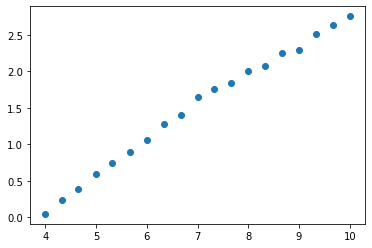

In [48]:
plt.scatter(np.log2(n_w), np.log2(F_w))

In [66]:
sd_x= np.std(wn, ddof=1)
rvals_vect = nolds.logarithmic_r(0.001 * sd_x, 5* sd_x, 1.03)
dim_corr,set_cr = nolds.corr_dim(wn,emb_dim=1, rvals=rvals_vect, debug_data=True)

/Users/mariolavanga/Documents/GitHub/nonlinear_signals_analysis/env/lib/python3.7/site-packages/nolds/measures.py:28: RuntimeWarning: fitting mode 'RANSAC' requires the package sklearn, using 'poly' instead
  RuntimeWarning)


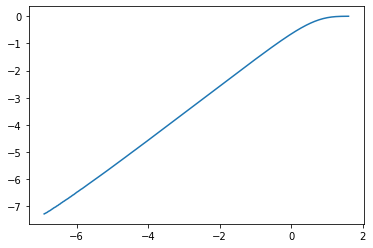

In [67]:
plt.plot(set_cr[0],set_cr[1])

In [68]:
print(dim_corr)

0.9346116818555219


In [150]:
# Create an image of the Lorenz attractor.
# The maths behind this code is described in the scipython blog article
# at https://scipython.com/blog/the-lorenz-attractor/
# Christian Hill, January 2016.
# Updated, January 2021 to use scipy.integrate.solve_ivp.

WIDTH, HEIGHT, DPI = 1000, 750, 100

# Lorenz paramters and initial conditions.
sigma, beta, rho = 100/250, 5000, 5
u0, v0, w0 = 0, 1, 1

# Maximum time point and total number of time points.
tmax, n = 10, 3000

def lorenz_lin(t, X, sigma,beta,rho):
    """The Lorenz equations."""
    u, v, w = X
    up = v
    vp = sigma*w 
    wp = -beta*v-rho*w
    return up, vp, wp

# Integrate the Lorenz equations.
soln = solve_ivp(lorenz_lin, (0, tmax), (u0, v0, w0), args=(sigma, beta, rho),
                 dense_output=True)
# Interpolate solution onto the time grid, t.
t = np.linspace(0, tmax, n)
x, y, z = soln.sol(t)

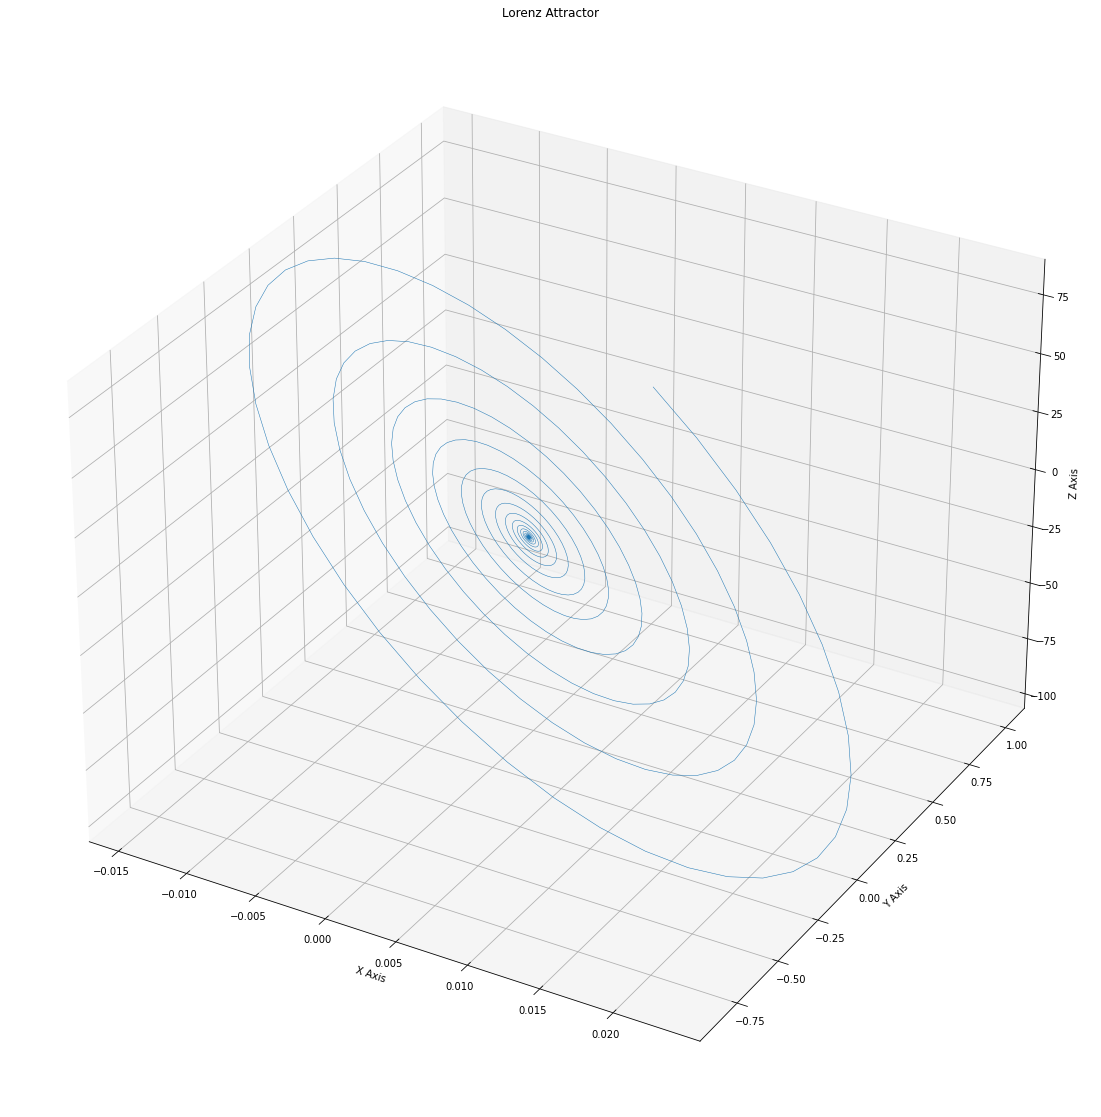

In [151]:
ax = plt.figure(figsize = (20,20)).add_subplot(projection='3d')

ax.plot(x, y, z, lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")
plt.show()

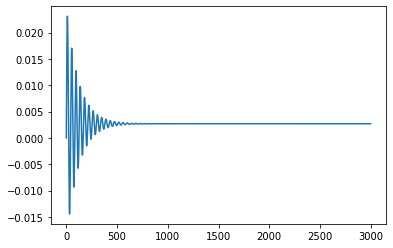

In [152]:
plt.plot(x)

In [153]:
h = nolds.dfa(x)
print(h)

1.0463339252394595


/Users/mariolavanga/Documents/GitHub/nonlinear_signals_analysis/env/lib/python3.7/site-packages/nolds/measures.py:28: RuntimeWarning: fitting mode 'RANSAC' requires the package sklearn, using 'poly' instead
  RuntimeWarning)


In [167]:
nMin = 16
nMax = 1024
nScales = 32
exponents = np.linspace(np.log2(nMin), np.log2(nMax), nScales)
scales = np.round(np.power(2.0, exponents)).astype(np.int64)
q_list = [-5, -3, -1, 1, 3, 5]

In [168]:
def test_mat_dfa_lorenz(x):
    x_dfa = fathon.DFA(fu.toAggregated(x))
    n_w, F_w = x_dfa.computeFlucVec(scales, revSeg=False, polOrd=1)
    idxs = get_idxs(n_w, scales)
    n_w = n_w[idxs]
    F_w = F_w[idxs]
    H, _ = np.polyfit(np.log2(n_w), np.log2(F_w), 1)
    return H,n_w,F_w

In [169]:
H,n_w,F_w = test_mat_dfa_lorenz(x)
print(H)

0.3169057610585216


In [164]:
sd_x= np.std(x, ddof=1)
rvals_vect = nolds.logarithmic_r(0.01 * sd_x, 2 * sd_x, 1.03)
dim_corr,set_cr = nolds.corr_dim(x,emb_dim=1, rvals=rvals_vect, debug_data=True)

/Users/mariolavanga/Documents/GitHub/nonlinear_signals_analysis/env/lib/python3.7/site-packages/nolds/measures.py:28: RuntimeWarning: fitting mode 'RANSAC' requires the package sklearn, using 'poly' instead
  RuntimeWarning)


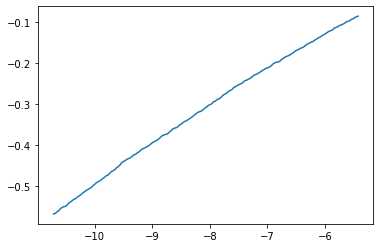

In [165]:
plt.plot(set_cr[0],set_cr[1])

In [166]:
print(dim_corr)

0.09173343446291961
